# Task 1 - Data Analysis and Preprocessing

In [1]:
# %pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sys.path.append(os.path.abspath("../Script"))
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("..")
# print(os.getcwd()) 

In [3]:
from data_load import *

In [4]:
    # Load datasets
fraud_df = load_and_clean_data("Data/Fraud_Data.csv")
ip_df = load_and_clean_data("Data/IpAddress_to_Country.csv")
credit_df = load_and_clean_data("Data/creditcard.csv")

Loaded: Data/Fraud_Data.csv | Rows: 151112, Columns: 11
Cleaned: Removed duplicates and empty rows.
Loaded: Data/IpAddress_to_Country.csv | Rows: 138846, Columns: 3
Cleaned: Removed duplicates and empty rows.
Loaded: Data/creditcard.csv | Rows: 284807, Columns: 31
Cleaned: Removed duplicates and empty rows.


In [27]:
# Data type of two datasets
pd.concat([fraud_df.dtypes.rename('fraud_df'), ip_df.dtypes.rename('ip_df')], axis=1)

,fraud_df,ip_df
user_id,Int64,NaN
signup_time,string[python],NaN
purchase_time,string[python],NaN
purchase_value,Int64,NaN
device_id,string[python],NaN
source,string[python],NaN
browser,string[python],NaN
sex,string[python],NaN
age,Int64,NaN
ip_address,Float64,NaN


In [5]:
fraud_df.dtypes

user_id                    Int64
signup_time       string[python]
purchase_time     string[python]
purchase_value             Int64
device_id         string[python]
source            string[python]
browser           string[python]
sex               string[python]
age                        Int64
ip_address               Float64
class                      Int64
dtype: object

In [6]:
# # Data type of two datasets
# # pd.concat([fraud_df, ip_df], axis=1).tail()
# combined_df = pd.concat([fraud_df, ip_df], axis=1)
# combined_df.head()

min_len = min(len(fraud_df), len(ip_df))

fraud_df_trunc = fraud_df.iloc[:min_len].reset_index(drop=True)
ip_df_trunc = ip_df.iloc[:min_len].reset_index(drop=True)

combined_df = pd.concat([fraud_df_trunc, ip_df_trunc], axis=1)
combined_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,16777216,16777471,Australia
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,16777472,16777727,China
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,16777728,16778239,China
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,16778240,16779263,Australia
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,16779264,16781311,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138841,247696,2015-02-17 21:13:03,2015-03-24 01:51:20,44,EQCFZJCMSVWRP,SEO,Safari,F,27,758375292.292255,0,3758092288,3758093311,Hong Kong
138842,299384,2015-01-10 21:17:17,2015-01-10 21:17:18,35,VMZFQRAKOVOFX,Direct,FireFox,M,36,3877823434.63715,1,3758093312,3758094335,India
138843,90291,2015-03-27 05:09:03,2015-06-17 12:14:14,18,AACRSKFMHVMCE,SEO,Chrome,M,48,2236453895.75165,0,3758095360,3758095871,China
138844,28946,2015-01-31 05:15:18,2015-02-12 12:40:27,52,JCBWXXFCMDFQQ,Ads,IE,F,26,3559905107.13878,0,3758095872,3758096127,Singapore


In [7]:
# merged_df = fraud_df.merge(ip_df, how='left', on='upper_bound_ip_address')
print("fraud_df columns:", fraud_df.columns)
print("ip_df columns:", ip_df.columns)

fraud_df columns: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')
ip_df columns: Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


In [9]:
# # Convert bounds to integers if not already
# ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
# ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)

# # Function to map IP to country
# def map_country(ip):
#     match = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)]
#     return match['country'].values[0] if not match.empty else None

# # Apply function
# fraud_df['country'] = fraud_df['ip_int'].apply(map_country)
# fraud_df

In [10]:
    # Handle missing
fraud_df = handle_missing_values(fraud_df)
ip_df = handle_missing_values(ip_df)
credit_df = handle_missing_values(credit_df)

Missing values before handling:
 Series([], dtype: int64)
Missing values handled.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.


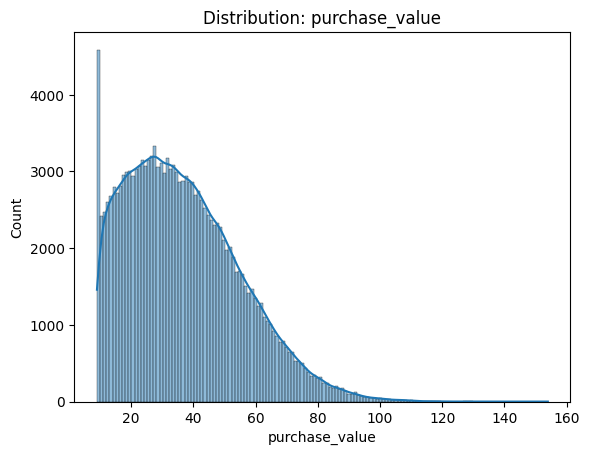

In [11]:
  # EDA for Univariate analysis
eda_univariate(fraud_df, ['purchase_value'])

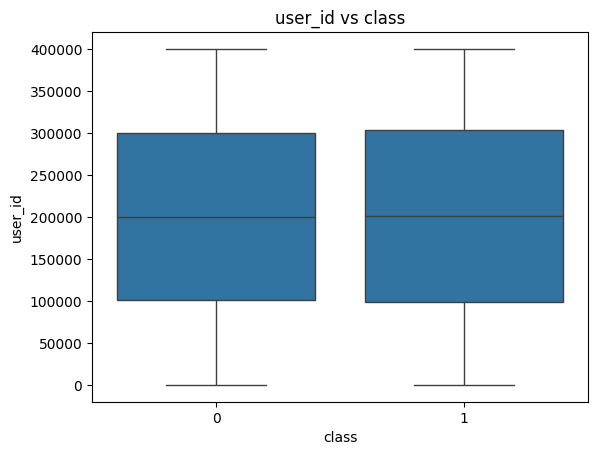

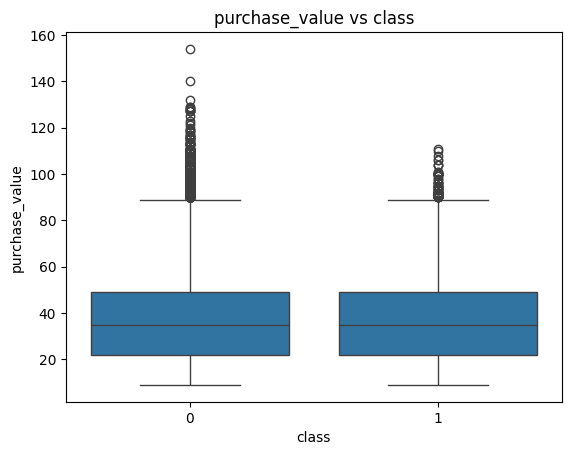

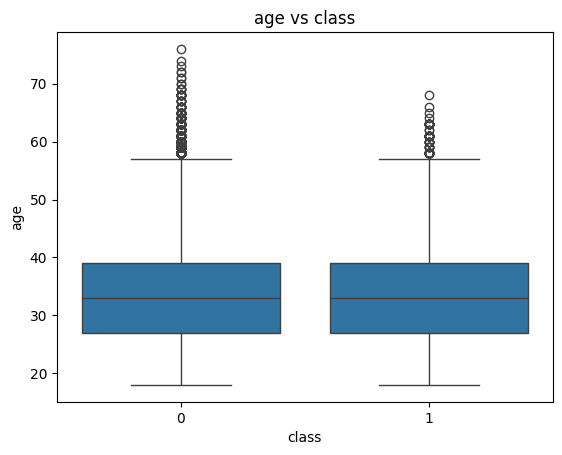

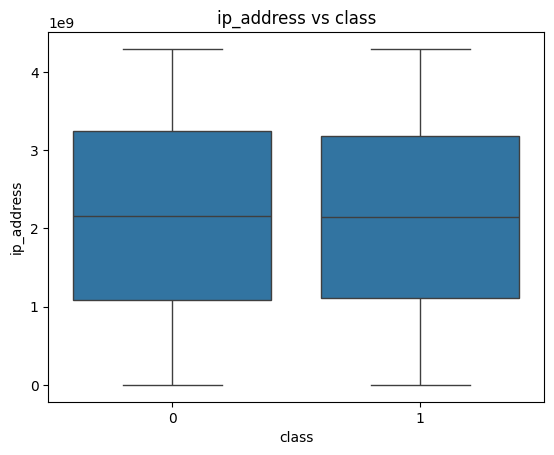

In [12]:
  # EDA for Bivariate analysis
eda_bivariate(fraud_df, 'class')  # assumes 'class' column for fraud label

In [13]:
  # Merge IP info
fraud_df = merge_ip_geolocation(fraud_df, ip_df)

Error merging IP geolocation: Cannot convert non-finite values (NA or inf) to integer


In [14]:
 # Feature engineering
fraud_df = feature_engineering_fraud(fraud_df)

NameError: name 'feature_engineering_fraud' is not defined

In [ ]:
# Encode + scale fraud_df
cat_cols = fraud_df.select_dtypes(include='object').columns.tolist()
fraud_df = encode_categorical(fraud_df, cat_cols)

X = fraud_df.drop('class', axis=1)
y = fraud_df['class']

# Scaling and balancing
X_scaled = scale_data(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_bal, y_train_bal = balance_classes(X_train, y_train)

# Similarly, process credit_df for supervised ML
if 'Class' in credit_df.columns:
    credit_df = encode_categorical(credit_df, credit_df.select_dtypes(include='object').columns.tolist())
    X_credit = credit_df.drop('Class', axis=1)
    y_credit = credit_df['Class']
    X_credit_scaled = scale_data(X_credit)
    X_credit_train, _, y_credit_train, _ = train_test_split(X_credit_scaled, y_credit, test_size=0.2)
    X_credit_bal, y_credit_bal = balance_classes(X_credit_train, y_credit_train)

print("Task 1 complete.")

Loaded: Data/Fraud_Data.csv | Rows: 151112, Columns: 11
Cleaned: Removed duplicates and empty rows.
Loaded: Data/IpAddress_to_Country.csv | Rows: 138846, Columns: 3
Cleaned: Removed duplicates and empty rows.
Loaded: Data/creditcard.csv | Rows: 284807, Columns: 31
Cleaned: Removed duplicates and empty rows.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.
Missing values before handling:
 Series([], dtype: int64)
Missing values handled.


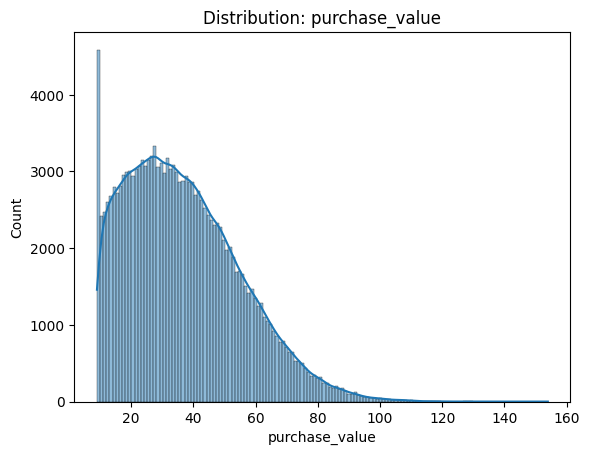

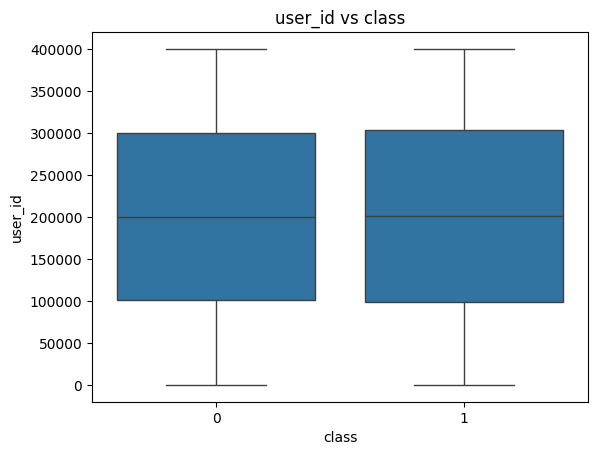

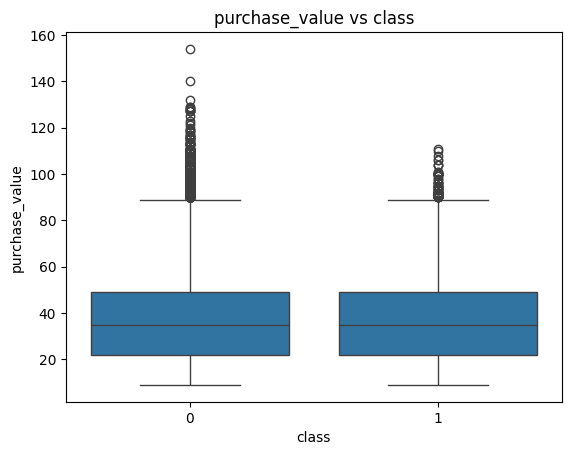

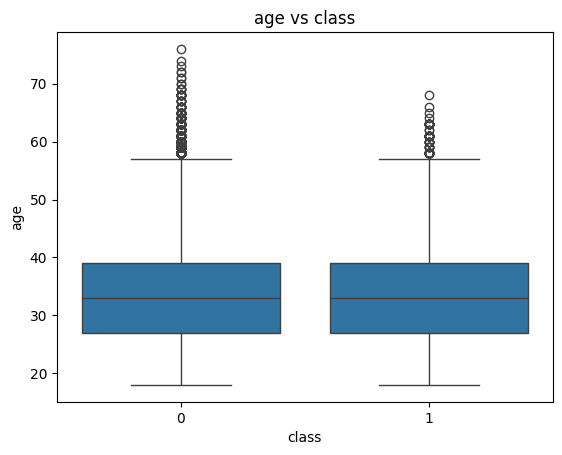

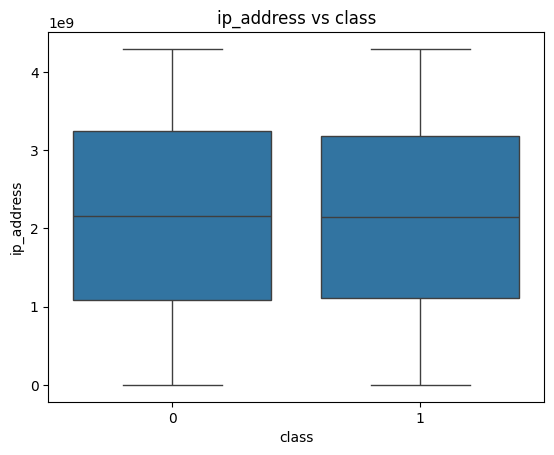

Error merging IP geolocation: incompatible merge keys [0] dtype('float64') and dtype('int64'), must be the same type


NameError: name 'feature_engineering_fraud' is not defined

In [8]:
run_pipeline()